C:\Users\pilla\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


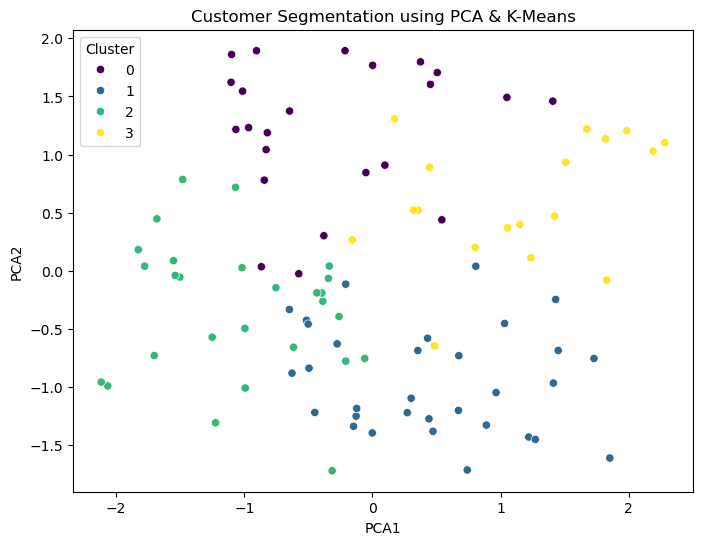

C:\Users\pilla\AppData\Local\Temp\ipykernel_21852\3004135342.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data, palette='coolwarm')


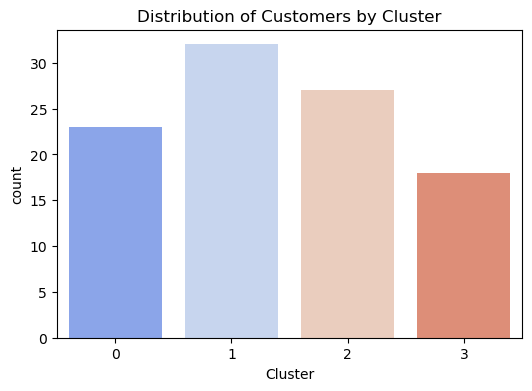

C:\Users\pilla\AppData\Local\Temp\ipykernel_21852\3004135342.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending', data=data, palette='Set2')


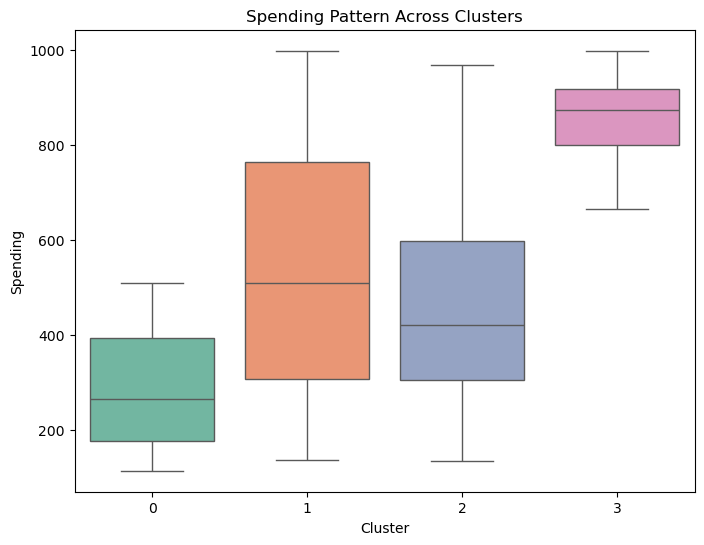

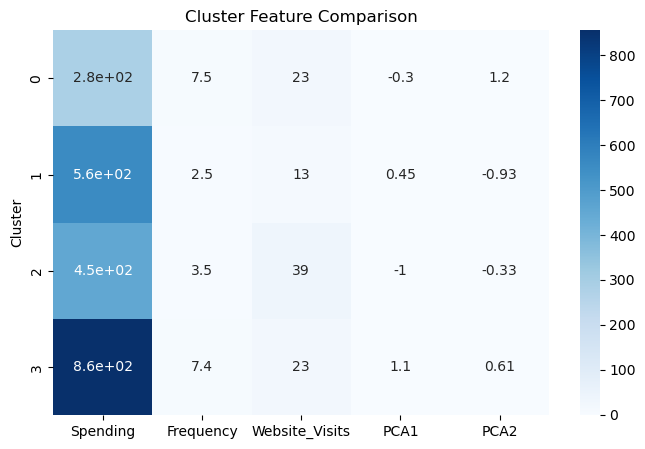

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Sample customer data (Replace with actual dataset)
data = pd.DataFrame({
    'Spending': np.random.randint(100, 1000, 100),
    'Frequency': np.random.randint(1, 10, 100),
    'Website_Visits': np.random.randint(1, 50, 100)
})

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Applying K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Scatter Plot with PCA (Reducing to 2D for visualization)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
data['PCA1'], data['PCA2'] = pca_data[:, 0], pca_data[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segmentation using PCA & K-Means')
plt.show()

# Cluster Distribution Plot
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=data, palette='coolwarm')
plt.title('Distribution of Customers by Cluster')
plt.show()

# Spending vs Frequency Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Spending', data=data, palette='Set2')
plt.title('Spending Pattern Across Clusters')
plt.show()

# Heatmap of Cluster Averages
cluster_means = data.groupby('Cluster').mean()
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_means, annot=True, cmap='Blues')
plt.title('Cluster Feature Comparison')
plt.show()